In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
import pydotplus
%matplotlib inline

In [2]:
from sklearn.datasets.california_housing import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




In [3]:
housing.data.shape

(20640, 8)

In [18]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [43]:
housing.feature_names[6:8]

['Latitude', 'Longitude']

In [42]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [22]:
housing_data = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_data.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [45]:
dtr = tree.DecisionTreeRegressor(max_depth=2)
dtr.fit(housing.data[:,[6,7]], housing.target)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [48]:
dot_data = tree.export_graphviz(
                dtr,
                out_file=None,
                feature_names=housing.feature_names[6:8],
                filled=True,
                impurity=False,
                rounded=True
        )

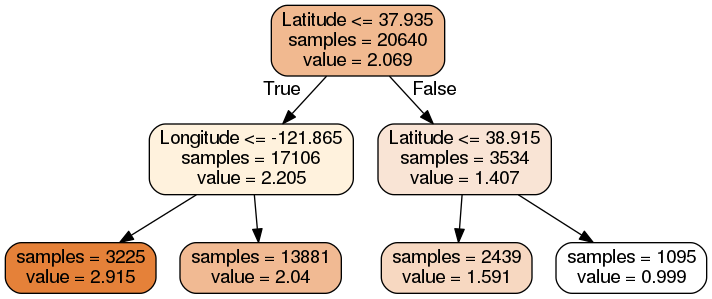

In [49]:
graph = pydotplus.graph_from_dot_data(dot_data)
graph.get_nodes()[7].set_fillcolor('#FFF2DD')
from IPython.display import Image
Image(graph.create_png())

In [31]:
graph.write_png('dtr_housing.png')

True

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
data_train, data_test, target_train, target_test = train_test_split(
    housing.data, housing.target, test_size=0.2, random_state=42
)
dtr = tree.DecisionTreeRegressor(random_state=42)
dtr.fit(data_train, target_train)
dtr.score(data_test, target_test)

0.6188454842434725

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(data_train, target_train)
rfr.score(data_test, target_test)

0.7838988693216546

In [37]:
from sklearn.grid_search import GridSearchCV

In [39]:
tree_param_grid = {'min_samples_split': list((3,6,9)), 'n_estimators': list((10, 50, 100))}
grid = GridSearchCV(RandomForestRegressor(), param_grid=tree_param_grid, cv=5)
grid.fit(data_train, target_train)
grid.grid_scores_, grid.best_params_, grid.best_score_

([mean: 0.78073, std: 0.00600, params: {'n_estimators': 10, 'min_samples_split': 3},
  mean: 0.80303, std: 0.00548, params: {'n_estimators': 50, 'min_samples_split': 3},
  mean: 0.80279, std: 0.00560, params: {'n_estimators': 100, 'min_samples_split': 3},
  mean: 0.78646, std: 0.00706, params: {'n_estimators': 10, 'min_samples_split': 6},
  mean: 0.80149, std: 0.00585, params: {'n_estimators': 50, 'min_samples_split': 6},
  mean: 0.80383, std: 0.00524, params: {'n_estimators': 100, 'min_samples_split': 6},
  mean: 0.78780, std: 0.00675, params: {'n_estimators': 10, 'min_samples_split': 9},
  mean: 0.80027, std: 0.00628, params: {'n_estimators': 50, 'min_samples_split': 9},
  mean: 0.80309, std: 0.00584, params: {'n_estimators': 100, 'min_samples_split': 9}],
 {'min_samples_split': 6, 'n_estimators': 100},
 0.8038319733637431)

In [40]:
rfr = RandomForestRegressor(min_samples_split=6, n_estimators=100, random_state=42)
rfr.fit(data_train, target_train)
rfr.score(data_test, target_test)

0.804385429449445

In [50]:
print(rfr.feature_importances_)

[0.53499751 0.05316705 0.04221091 0.02703957 0.02795009 0.13850005
 0.0882309  0.08790392]


In [41]:
pd.Series(rfr.feature_importances_, index=housing.feature_names).sort_values(ascending=False)

MedInc        0.534998
AveOccup      0.138500
Latitude      0.088231
Longitude     0.087904
HouseAge      0.053167
AveRooms      0.042211
Population    0.027950
AveBedrms     0.027040
dtype: float64